In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# Astronomical Data
## The case of the Sloan Digital Sky Survey

![sdss telescope](./images/06-sdss-telescope-small.jpg)

- 2.5 m telescope at Apache Point Observatory, New Mexico.
    - *Let's talk about spatial resolution*

Airy Rings

![Airy ring](./images/06-Airy-ring.jpg)


Rayleigh Criterion

![Angular Resolution](./images/06-angular-resolution.png)

Atmospheric Seeing

![Seeing](./images/06-seeing.jpg)



- 12.000 deg$^2$ (full sky ~40.000 deg$^2$)


- 120 MP camera; 0.396 arcsec/pixel.
    - *Let's talk about CCDs*


- Imaging in 5 photometric bands: $u, g, r, i , z$
    - *Let's talk about astronomical filters*


![sdss filters](./images/06-sdss-filters.png)



- Photometry with precision of up to 0.01-0.02 mag
- Limiting magnitude is $r\sim22.5$
    - *Let's talk about the magnitude system in Astronomy, and uncertainties in magnitudes.*

---

### A word about photometry

- For stars, fairly simple. Define an aperture that contains the star, define a ring to estimate the background and subtract it.
- But what about an extended source like a galaxy?


### Let's look at an example image

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS
from astropy import coordinates as coords

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)

In [5]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, radius='5 arcsec', spectro=True)
print(xid)

       ra              dec        ...     specobjid      run2d
---------------- ---------------- ... ------------------ -----
2.02344596573482 14.8398237551311 ... 845594848269461504    26


In [6]:
im = SDSS.get_images(matches=xid, band='r')
data = im[0][0].data
std = data.std()

In [7]:
im[0][0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4476758604.64 / 1st row - Number of seconds since Nov 17 1858  
RA      =            1.372413  / 1st row - Right ascension of telescope boresigh
DEC     =            14.971297 / 1st row - Declination of telescope boresight (d
SPA     =              89.062  / 1st row - Camera col position angle wrt north (
IPA     =              46.95

(array([4.06442e+05, 3.66812e+05, 3.02069e+05, 2.16331e+05, 1.41723e+05,
        8.37310e+04, 4.49420e+04, 2.36930e+04, 1.19740e+04, 6.16700e+03,
        3.38700e+03, 2.16500e+03, 1.60500e+03, 1.27600e+03, 1.08100e+03,
        9.84000e+02, 8.05000e+02, 7.60000e+02, 6.07000e+02, 5.66000e+02,
        4.87000e+02, 4.48000e+02, 4.10000e+02, 3.66000e+02, 2.43000e+02,
        3.29000e+02, 2.77000e+02, 2.92000e+02, 2.66000e+02, 2.54000e+02,
        2.36000e+02, 2.28000e+02, 1.90000e+02, 1.95000e+02, 1.87000e+02,
        1.41000e+02, 1.54000e+02, 1.56000e+02, 1.54000e+02, 1.16000e+02,
        1.34000e+02, 1.47000e+02, 1.24000e+02, 1.13000e+02, 1.15000e+02,
        9.30000e+01, 1.05000e+02, 1.00000e+02, 9.10000e+01, 8.60000e+01,
        1.02000e+02, 8.40000e+01, 9.20000e+01, 6.30000e+01, 6.90000e+01,
        9.30000e+01, 5.50000e+01, 5.50000e+01, 7.00000e+01, 4.90000e+01,
        7.00000e+01, 6.10000e+01, 6.30000e+01, 4.80000e+01, 5.70000e+01,
        5.00000e+01, 5.10000e+01, 4.90000e+01, 7.00

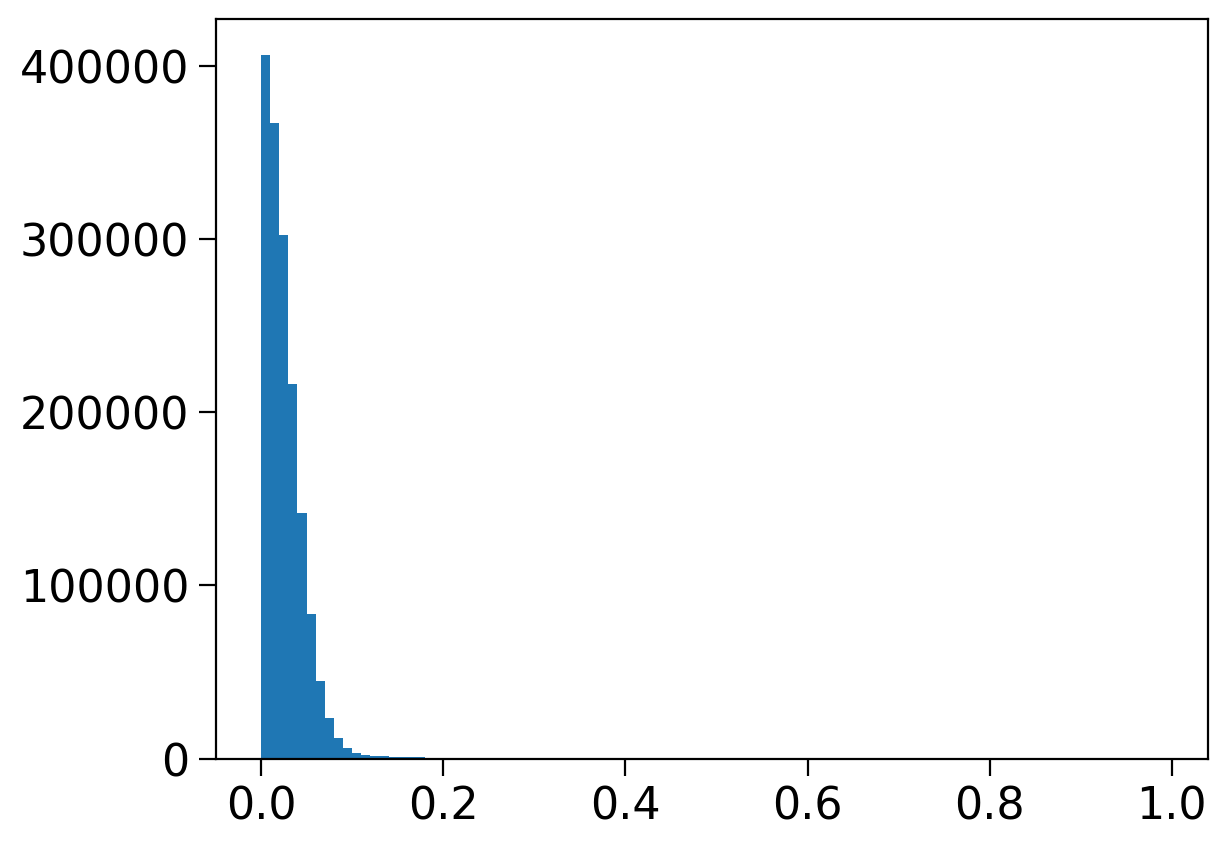

In [8]:
plt.hist(data.flatten(), bins =np.arange(0,1,.01))

<IPython.core.display.Javascript object>


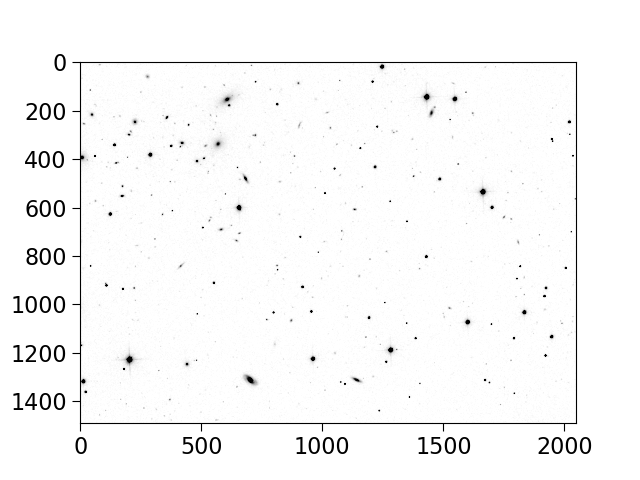

In [9]:
%matplotlib notebook
plt.imshow(data,vmin=0,vmax=std,cmap='gray_r')

<IPython.core.display.Javascript object>


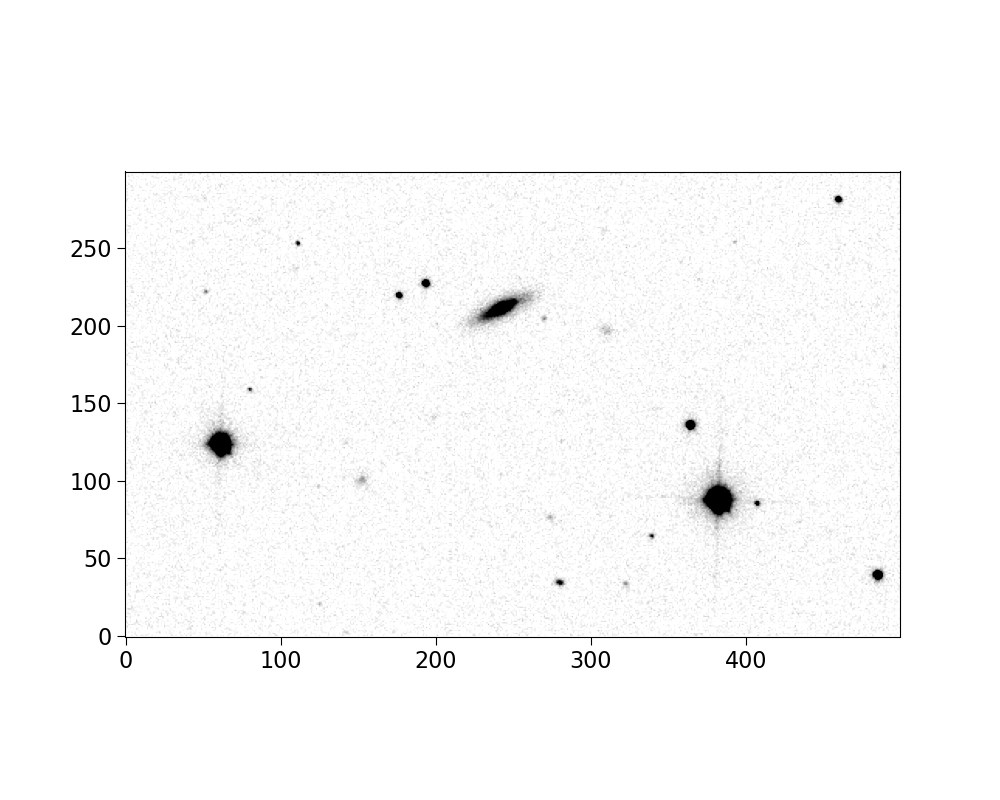

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(data[1100: 1400, 900:1400], origin='lower', vmin=0, vmax=std, cmap='gray_r')

- DR7 includes ~1.6 M spectra: 900,000 Galaxies, 120,000 QSOs, and 460,000 stars
- These are taken with fibers with a 3" diameter size
- Wavelength coverage: 3800--9200 Angstroms
- R ~ 2000

*Let's discuss about Astronomical spectra*

<IPython.core.display.Javascript object>


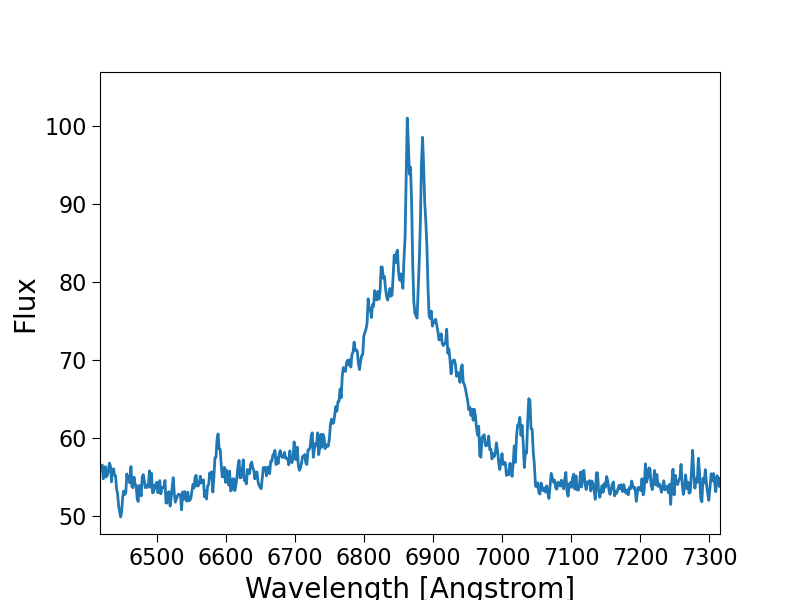

In [11]:
sp = SDSS.get_spectra(matches=xid)

plt.figure(figsize=(8, 6))

plt.plot(10**(sp[0][1].data.loglam), sp[0][1].data.flux)

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux');

- The total size of DR7 is ~60TB
- "Stripe 82" was observed periodically and repeatedly. This is the deepest patch in SDSS but also one with __"time domain"__ information.


SDSS was a pioneer in the development of "data mining" in astronomy and the push of Machine Learning and Big Data tools to get information from its gigantic data set.